<a href="https://colab.research.google.com/github/N1colasFD/mixed-analytics-for-data-Science/blob/main/Word_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [37]:
import pandas as pd 
import seaborn as sns
from pandas.io.json import json_normalize
import requests
import urllib.request, json 
import requests
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

#Display 6 registros
pd.options.display.min_rows = 4

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Programacion/Bases de datos/world_population.csv')
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [40]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [42]:
df.sort_values(by = 'Rank').head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


In [7]:
df['World Population Percentage'].sum()

99.93

In [44]:
df.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [8]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [9]:
df.rename(columns = {'2022 Population':'world_2022_population',
                     '2020 Population':'2020_population',
                     '2015 Population':'2015_population',
                     '2010 Population':'2010_population',
                     '2000 Population':'2000_population',
                     '1990 Population':'1990_population',
                     '1980 Population':'1980_population',
                     '1970 Population':'1970_population',
                     'Growth Rate':'growth_rate',
                     'World Population Percentage':'World_Population_Percentage'}, inplace = True)

In [10]:
df.loc[df['Country/Territory'] == 'Colombia']

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.4339,1.0069,0.65


In [11]:
df.loc[df['world_2022_population'] == 510]

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0,0.998,0.0


In [12]:
df['world_2022_population'].sum()

7973413042

In [13]:
df['Total_Growth_2022_2020'] = df['world_2022_population'] - df['2020_population']
df['Total_Growth_2022_1970'] = df['world_2022_population'] - df['1970_population']

In [14]:
df.sort_values(by = "Total_Growth_2022_1970", ascending = False)

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Total_Growth_2022_2020,Total_Growth_2022_1970
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,20786046,859671872
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,957556,603352887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09,-197222,-1800997
218,38,UKR,Ukraine,Kiev,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50,-4207927,-7577347


In [16]:
df.groupby(['world_2022_population','2020_population','2015_population','2010_population','2000_population','1990_population','1980_population','1970_population'])[['growth_rate']].agg(['count','mean']).reset_index() 

world_2022_population 2020_population 2015_population 2010_population  \
                                                                            
0                     510             520             564             596   
1                    1871            1827            1454            1367   
..                    ...             ...             ...             ...   
232            1417173173      1396387127      1322866505      1240613620   
233            1425887337      1424929781      1393715448      1348191368   

    2000_population 1990_population 1980_population 1970_population  \
                                                                      
0               651             700             733             752   
1              1666            1669            1647            1714   
..              ...             ...             ...             ...   
232      1059633675       870452165       696828385       557501301   
233      1264099069      1153704252       982372466       822534450   

    growth_rate          
          count    mean  
0             1  0.9980  
1             1  1.0119  
..          ...     ...  
232           1  1.0068  
233           1  1.0000  

[234 rows x 10 columns]

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   world_2022_population        234 non-null    int64  
 6   2020_population              234 non-null    int64  
 7   2015_population              234 non-null    int64  
 8   2010_population              234 non-null    int64  
 9   2000_population              234 non-null    int64  
 10  1990_population              234 non-null    int64  
 11  1980_population              234 non-null    int64  
 12  1970_population              234 non-null    int64  
 13  Area (km²)          

In [18]:
df.loc[df['Country/Territory'] == 'China']

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Total_Growth_2022_2020,Total_Growth_2022_1970
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0,17.88,957556,603352887


In [19]:
#Primero creamos el lag
df['Acum_lag_1'] = df.groupby('Country/Territory').world_2022_population.shift(1, fill_value=0)
#Creamos el indicador
df['Menor_100M'] = np.where(df.world_2022_population - df.Acum_lag_1 <= 100000000,1,0)
df['Mayor_100M'] = np.where(df.world_2022_population - df.Acum_lag_1 >= 100000000,1,0)



In [20]:
df[['Country/Territory','Acum_lag_1','Mayor_100M']].head().sort_values(by = 'Mayor_100M', ascending  =True)

,Country/Territory,Acum_lag_1,Mayor_100M
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,American Samoa,0,0
4,Andorra,0,0


In [21]:
df[['Country/Territory','Acum_lag_1','Menor_100M']].head().sort_values(by = 'Menor_100M', ascending  =True)

,Country/Territory,Acum_lag_1,Menor_100M
0,Afghanistan,0,1
1,Albania,0,1
2,Algeria,0,1
3,American Samoa,0,1
4,Andorra,0,1


In [22]:
df.shape

(234, 22)

In [23]:
df.head(60).sort_values(by = 'Rank', ascending = True)

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Total_Growth_2022_2020,Total_Growth_2022_1970,Acum_lag_1,Menor_100M,Mayor_100M
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,...,822534450,9706961,146.8933,1.0000,17.88,957556,603352887,0,0,1
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,...,96369875,8515767,25.2841,1.0046,2.70,2117194,118943623,0,0,1
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,...,67541860,147570,1160.0350,1.0108,2.15,3765421,103644512,0,0,1
57,14,EGY,Egypt,Cairo,Africa,110990103,107465134,97723799,87252413,71371371,...,34781986,1002450,110.7188,1.0158,1.39,3524969,76208117,0,0,1
55,15,COD,DR Congo,Kinshasa,Africa,99010212,92853164,78656904,66391257,48616317,...,20151733,2344858,42.2244,1.0325,1.24,6157048,78858479,0,1,0
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,...,20905254,1141748,45.4339,1.0069,0.65,943362,30968770,0,1,0
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,...,23842803,2780400,16.3683,1.0052,0.57,474286,21667515,0,1,0
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,13795915,2381741,18.8531,1.0164,0.56,1451559,31107310,0,1,0
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,10752971,652230,63.0587,1.0257,0.52,2156541,30375800,0,1,0
35,39,CAN,Canada,Ottawa,North America,38454327,37888705,35732126,33963412,30683313,...,21434577,9984670,3.8513,1.0078,0.48,565622,17019750,0,1,0


In [24]:
df.nlargest(n = 3, columns = 'Mayor_100M')

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Total_Growth_2022_2020,Total_Growth_2022_1970,Acum_lag_1,Menor_100M,Mayor_100M
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,...,67541860,147570,1160.0350,1.0108,2.15,3765421,103644512,0,0,1
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,...,96369875,8515767,25.2841,1.0046,2.70,2117194,118943623,0,0,1
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,...,822534450,9706961,146.8933,1.0000,17.88,957556,603352887,0,0,1


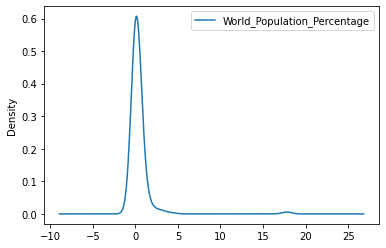

In [25]:
df[['Country/Territory','World_Population_Percentage']].plot(kind = 'density');

In [ ]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Total_Growth_2022_2020,Total_Growth_2022_1970,Acum_lag_1,Menor_100M,Mayor_100M
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,10752971,652230,63.0587,1.0257,0.52,2156541,30375800,0,1,0
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,2324731,28748,98.8702,0.9957,0.04,-24528,517590,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,...,4281671,752612,26.5976,1.0280,0.25,1089960,15736004,0,1,0
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,...,5202918,390757,41.7665,1.0204,0.20,650871,11117619,0,1,0


In [35]:
df.groupby(['Rank','Country/Territory', 'Total_Growth_2022_2020']).size().unstack(fill_value=0)

,Total_Growth_2022_2020,-4207927,-1293069,-904015,-463105,-197222,-188757,-173184,-136640,-127261,-98786,...,3368032,3524969,3643369,3765421,3793230,6157048,6189013,8628121,10213807,20786046
Rank,Country/Territory,,,,,,,,,,,,,,,,,,,,,
1,China,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,India,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Tokelau,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,Vatican City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Minicub
Dimensiones = ['world_2022_population','2020_population','2015_population','2010_population','2000_population']
Metricas =  ['World_Population_Percentage']

Minicub = (df[Dimensiones + Metricas].melt(id_vars = 'World_Population_Percentage')  #transaccional 
 .groupby(['variable','value']).World_Population_Percentage.agg(conteo = 'count', suma  = 'sum') #como en conteno siempre es 1
 .assign(media = lambda x: x.suma / x.conteo) 
)

Minicub

conteo   suma  media
variable              value                           
2000_population       651              1   0.00   0.00
                      1666             1   0.00   0.00
...                                  ...    ...    ...
world_2022_population 1417173173       1  17.77  17.77
                      1425887337       1  17.88  17.88

[1170 rows x 3 columns]

In [ ]:
Minicub.media.nlargest()

variable               value     
2000_population        1264099069    17.88
2010_population        1348191368    17.88
2015_population        1393715448    17.88
2020_population        1424929781    17.88
world_2022_population  1425887337    17.88
Name: media, dtype: float64

In [ ]:
Minicub.reset_index(inplace =True)

In [ ]:
Minicub

,variable,value,conteo,suma,media
0,2000_population,651,1,0.00,0.00
1,2000_population,1666,1,0.00,0.00
...,...,...,...,...,...
1168,world_2022_population,1417173173,1,17.77,17.77
1169,world_2022_population,1425887337,1,17.88,17.88


#modelo Predictivo

# Analisis de Pareto

In [ ]:
# 1. Agregar para conseguir la tabla de partida
wpp = df.groupby('2022_population')[['World Population Percentage']].sum()
wpp

,World Population Percentage
2022_population,
510,0.00
1871,0.00
...,...
1417173173,17.77
1425887337,17.88


In [ ]:
# 2. Ordenar en descendente por la métrica de interés
wpp.sort_values('World Population Percentage', ascending = False, inplace = True)
wpp

,World Population Percentage
2022_population,
1425887337,17.88
1417173173,17.77
...,...
84519,0.00
510,0.00


In [ ]:
# 3. Crear una variable con la posición, siendo 1 el mayor valor y aumentando secuencialmente hasta llegar al menor valor

wpp['Posicion'] = np.arange(start = 1, stop = len(wpp) + 1)
wpp

,World Population Percentage,Posicion
2022_population,,
1425887337,17.88,1
1417173173,17.77,2
...,...,...
84519,0.00,233
510,0.00,234


In [ ]:
# 4. Crear una variable con la posición en porcentaje, dividiendo cada posición por el total de registros

wpp['Posicion_Porc'] = wpp.Posicion.transform(lambda x: x / wpp.shape[0] * 100)
wpp

,World Population Percentage,Posicion,Posicion_Porc
2022_population,,,
1425887337,17.88,1,0.427350
1417173173,17.77,2,0.854701
...,...,...,...
84519,0.00,233,99.572650
510,0.00,234,100.000000


In [ ]:
# 5. Crear una variable con la suma acumulada del valor
wpp['Acum'] = wpp['World Population Percentage'].cumsum()
wpp

,World Population Percentage,Posicion,Posicion_Porc,Acum
2022_population,,,,
1425887337,17.88,1,0.427350,17.88
1417173173,17.77,2,0.854701,35.65
...,...,...,...,...
84519,0.00,233,99.572650,99.93
510,0.00,234,100.000000,99.93


In [ ]:
# 6. Crear una variable con el acumulado en porcentaje, dividiendo cada valor por el máximo del acumulado
wpp['Acum_Porc'] = wpp.Acum.transform(lambda x: x / max(wpp.Acum) * 100)
wpp

,World Population Percentage,Posicion,Posicion_Porc,Acum,Acum_Porc
2022_population,,,,,
1425887337,17.88,1,0.427350,17.88,17.892525
1417173173,17.77,2,0.854701,35.65,35.674972
...,...,...,...,...,...
84519,0.00,233,99.572650,99.93,100.000000
510,0.00,234,100.000000,99.93,100.000000


In [ ]:
# 7. Por claridad quedarnos solo con las variables index, posición en porcentaje y acumulado en porcentaje
wpp = wpp[['Posicion_Porc','Acum_Porc']]
wpp

,Posicion_Porc,Acum_Porc
2022_population,,
1425887337,0.427350,17.892525
1417173173,0.854701,35.674972
...,...,...
84519,99.572650,100.000000
510,100.000000,100.000000


In [ ]:
wpp.Posicion_Porc.values

array([  0.42735043,   0.85470085,   1.28205128,   1.70940171,
         2.13675214,   2.56410256,   2.99145299,   3.41880342,
         3.84615385,   4.27350427,   4.7008547 ,   5.12820513,
         5.55555556,   5.98290598,   6.41025641,   6.83760684,
         7.26495726,   7.69230769,   8.11965812,   8.54700855,
         8.97435897,   9.4017094 ,   9.82905983,  10.25641026,
        10.68376068,  11.11111111,  11.53846154,  11.96581197,
        12.39316239,  12.82051282,  13.24786325,  13.67521368,
        14.1025641 ,  14.52991453,  14.95726496,  15.38461538,
        15.81196581,  16.23931624,  16.66666667,  17.09401709,
        17.52136752,  17.94871795,  18.37606838,  18.8034188 ,
        19.23076923,  19.65811966,  20.08547009,  20.51282051,
        20.94017094,  21.36752137,  21.79487179,  22.22222222,
        22.64957265,  23.07692308,  23.5042735 ,  23.93162393,
        24.35897436,  24.78632479,  25.21367521,  25.64102564,
        26.06837607,  26.4957265 ,  26.92307692,  27.35

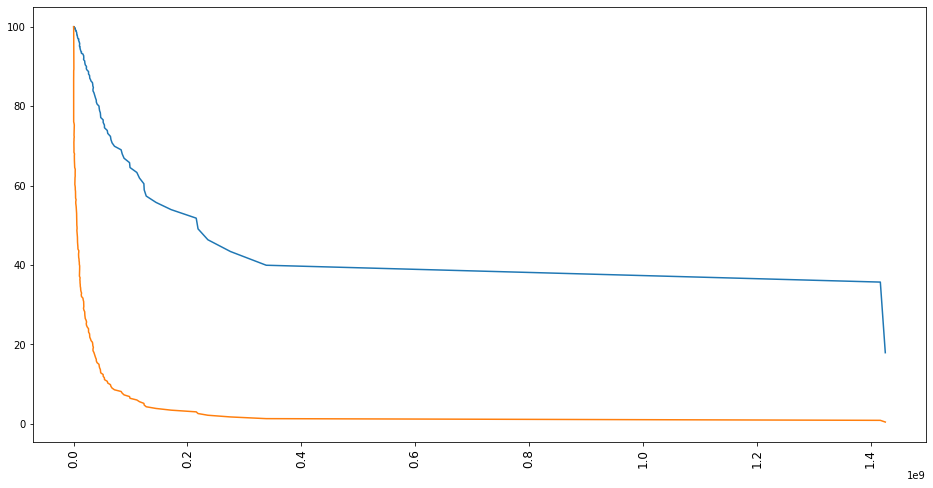

In [ ]:
# 8. Visualizarlo en un gráfico

f, ax = plt.subplots(figsize = (16,8))
ax.plot(wpp.index, wpp.Acum_Porc)
ax.plot(wpp.index, wpp.Posicion_Porc)
ax.tick_params(axis='x', labelsize=12, labelrotation=90)

In [ ]:
def Apply_pareto(wpp, salida = 'tabla'):
    #Ordenar en descendente y pasar a dataframe
    pareto = wpp.sort_values(ascending = False).to_frame()
    #Cambiar el nombre a la variable
    pareto.columns = ['World Population Percentage']
    #Crear la posición
    pareto['Posicion'] = np.arange(start = 1, stop = len(pareto) + 1)
    pareto['Posicion_Porc'] = pareto.Posicion.transform(lambda x: x / pareto.shape[0] * 100)
    #Crear el acumulado
    pareto['Acum'] = pareto['World Population Percentage'].cumsum()
    max_pareto_acum = max(pareto.Acum)
    pareto['Acum_Porc'] = pareto.Acum.transform(lambda x: x / max_pareto_acum * 100)
    #Simplificar
    pareto = pareto[['Posicion_Porc','Acum_Porc']]
    
    #Devolver la salida
    if salida == 'grafico':
        f, ax = plt.subplots(figsize = (16,8))
        ax.plot(pareto.Posicion_Porc, pareto.Acum_Porc)
        ax.plot(pareto.Posicion_Porc, pareto.Posicion_Porc)
        ax.tick_params(axis='x', labelsize=12, labelrotation=90)
        return(ax)
    else:
        return(pareto)

In [ ]:
taza_analisis = df.groupby('2022_population')[['World Population Percentage']].sum()
taza_analisis 

,World Population Percentage
2022_population,
510,0.00
1871,0.00
...,...
1417173173,17.77
1425887337,17.88


In [ ]:
#Llamamos la función para que nos devuelva la tabla con el Pareto
Apply_pareto(taza_analisis['World Population Percentage'])

,Posicion_Porc,Acum_Porc
2022_population,,
1425887337,0.427350,17.892525
1417173173,0.854701,35.674972
...,...,...
84519,99.572650,100.000000
510,100.000000,100.000000


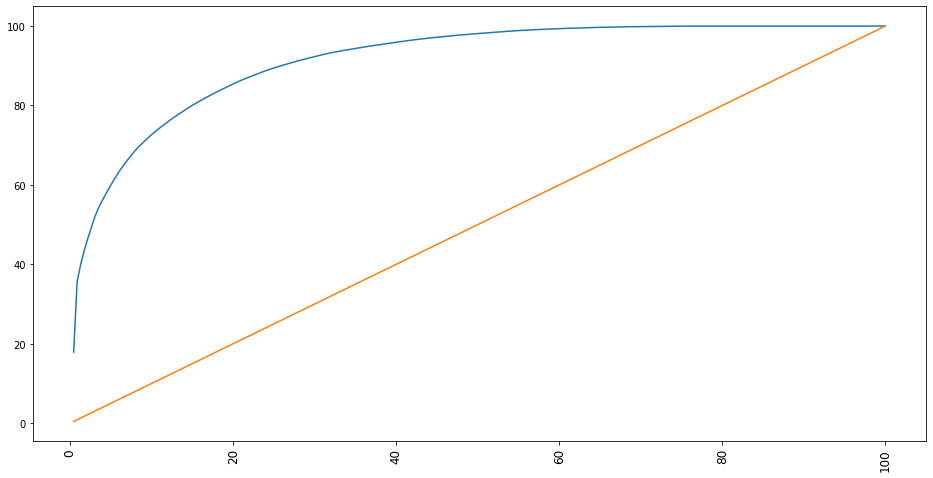

In [ ]:
#Y ahora le pedimos el gráfico
Apply_pareto(taza_analisis['World Population Percentage'], salida = 'grafico');